In [39]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt

import massimal.pipeline
importlib.reload(massimal.pipeline)

<module 'massimal.pipeline' from 'C:\\Users\\mha114\\Dropbox\\Python\\massimal\\src\\massimal\\pipeline.py'>

In [27]:
# Paths
dataset_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg')
calibration_dir = dataset_dir / 'calibration'
radiance_cailbration_file = next(calibration_dir.glob('*.icp'))
downwelling_calibration_file = next(calibration_dir.glob('*.dcp')) 
raw_image_dir = dataset_dir / '0_raw'
radiance_image_dir = dataset_dir / '0_radiance'
radiance_image_dir.mkdir(exist_ok=True)

dataset_base_name = 'massimal_larvik_olbergholmen_202308301228-south1_hsi'
raw_image_paths = sorted(raw_image_dir.rglob('*.bil.hdr'))

# raw_image_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg\\0_raw')
# raw_image_file = raw_image_dir / 'OlbergholmenS1-5/OlbergholmenS1_Pika_L_5.bil.hdr'
# raw_image_dw_spec_file = raw_image_dir / 'OlbergholmenS1-5/OlbergholmenS1_downwelling_5_pre.spec.hdr'

# raw_image_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20220624_Bodo_Juvika_FlatFieldSand')
# raw_image_file = raw_image_dir / 'Juvika_June2022_Pika_L_33-SpatialCrop.bil.hdr'
# raw_image_dw_spec_file = raw_image_dir / 'Juvika_June2022_downwelling_33_pre.spec.hdr'



In [12]:
# Parameters
rgb_ind = (30,78,126)

In [40]:
radiance_converter = massimal.pipeline.RadianceConverter(radiance_cailbration_file)

INFO: Non-empty calibration directory C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\calibration\radiance_calibration_frames
INFO: Skipping unzipping of calibration file, assuming unzipping already done.


In [5]:
raw_im,wl,raw_meta = massimal.pipeline.read_envi(raw_image_paths[0])

In [6]:
rad_im = radiance_converter.convert_raw_image_to_radiance(raw_im,raw_meta)

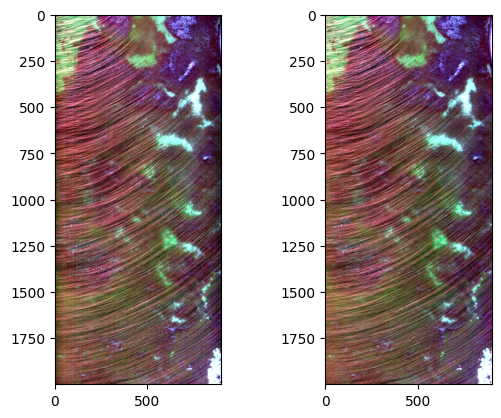

In [25]:
# Plot RGB renders of raw and radiance image (should look identical)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(massimal.image_render.percentile_stretch(raw_im[:,:,rgb_ind]))
ax[1].imshow(massimal.image_render.percentile_stretch(rad_im[:,:,rgb_ind]))
plt.show()

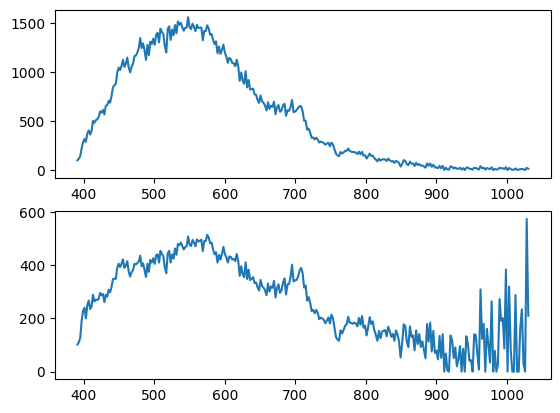

In [26]:
# Plot example raw and radiance spectrum
fig,ax = plt.subplots(nrows=2)
ax[0].plot(wl,raw_im[1000,450,:])
ax[1].plot(wl,rad_im[1000,450,:])
plt.show()

In [41]:
# Try direct conversion and saving to file
for raw_image_path in raw_image_paths:
    image_basename = raw_image_path.name.split('.bil')[0]
    image_number = int(image_basename.split('_')[-1])
    radiance_image_name = f'{dataset_base_name}_{image_number:03d}.bip.hdr'
    radiance_image_path = radiance_image_dir / radiance_image_name
    print(f'Saving radiance image as {radiance_image_path}')
    radiance_converter.convert_raw_file_to_radiance(raw_image_path,radiance_image_path)

Saving radiance image as C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\0_radiance\massimal_larvik_olbergholmen_202308301228-south1_hsi_005.bip.hdr
Saving radiance image as C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\0_radiance\massimal_larvik_olbergholmen_202308301228-south1_hsi_008.bip.hdr
